# Metody Obliczeniowe w Nauce i Technice Laboratorium 9
## Zastosowania DFT
### Paweł Gorgolewski

In [26]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

## 1. Analiza obrazów

1. Wczytaj obraz przedstawiajacy tekst, dokonaj odwrócenia kolorów (czarne tło), a
nastepnie jego transformacji do domeny czestotliwosciowej za pomoca DFT. Przedstaw
wartosci fazy i modułu współczynników Fouriera (osobno).
2. Wybierz przykładowego reprezentanta grupy - wytnij z duzego zdjecia wzorzec
obiektu np. litere e lub charakterystyczny fragment ryby z ławicy (imcrop).
3. Wykorzystujac transformacje Fouriera oblicz korelacje miedzy wybranym wzorcem,
a całym obrazem.
4. Przedstaw otrzymany obraz wyjsciowy oraz punkty, w których wykryto wystapienie
wzorca (nałóz je na obraz oryginalny).
5. Znajdz liczbe wystapien wzorca. Testy przeprowadz na dwóch zbiorach danych.

In [27]:
def find_patterns(original_image, pattern_image, min_val, extra_val_tranform=None, rgb_diffs=(-50,-80,50)):
    def prepare_img(img_path):
        img = Image.open(img_path)
        gray_scale = img.convert('L')
        inverted = ImageOps.invert(gray_scale)
        transformed = np.abs(np.array(inverted) - extra_val_tranform) if extra_val_tranform is not None else np.array(inverted)
        return img, np.swapaxes(transformed, 0, 1)

    def show_image(img, subplot_indexes, title, img_swapaxes=True, fun_before_show=None):
        img = np.swapaxes(np.array(img), 0, 1) if img_swapaxes else img
        img = fun_before_show(img) if fun_before_show is not None else img
        ax = plt.subplot(*subplot_indexes)
        ax.imshow(img, cmap='gray')
        ax.set_title(title)

    img, img_prepared = prepare_img(original_image)
    pattern_img, pattern_prepared = prepare_img(pattern_image)

    width, height = img.size
    dft = np.fft.fft2(img_prepared)

    fig = plt.figure(figsize=(20,20))
    fig.tight_layout()
    show_image(img_prepared, (4,2,1), "Processed image", True)
    show_image(pattern_prepared, (4,2,2), "Processed pattern", True)
    show_image(dft, (4,2,3), "Phase", True, lambda im: np.angle(im))
    show_image(dft, (4,2,4), "Amplitude", True, lambda im: np.log(abs(im)))

    C = np.real(np.fft.ifft2(np.multiply(dft, np.fft.fft2(np.rot90(pattern_prepared, 2), s=(width, height)))))
    C_min_v = min_val * (np.max(C) - np.min(C)) + np.min(C)

    pattern_width, pattern_height = pattern_img.size
    img_comp = img.load()
    for x, y in np.argwhere(C >= C_min_v):
        for pw in range(pattern_width):
            for ph in range(pattern_height):
                r, g, b = img_comp[x-pw, y-ph]
                diff_r, diff_g, diff_b = rgb_diffs
                img_comp[x-pw, y-ph] = (r+diff_r, g+diff_g, b+diff_b)

    show_image(img, (4,2,(5,8)), f'{len(np.argwhere(C >= C_min_v))} OCCURRENCES', False)
    plt.show()

### Ławica

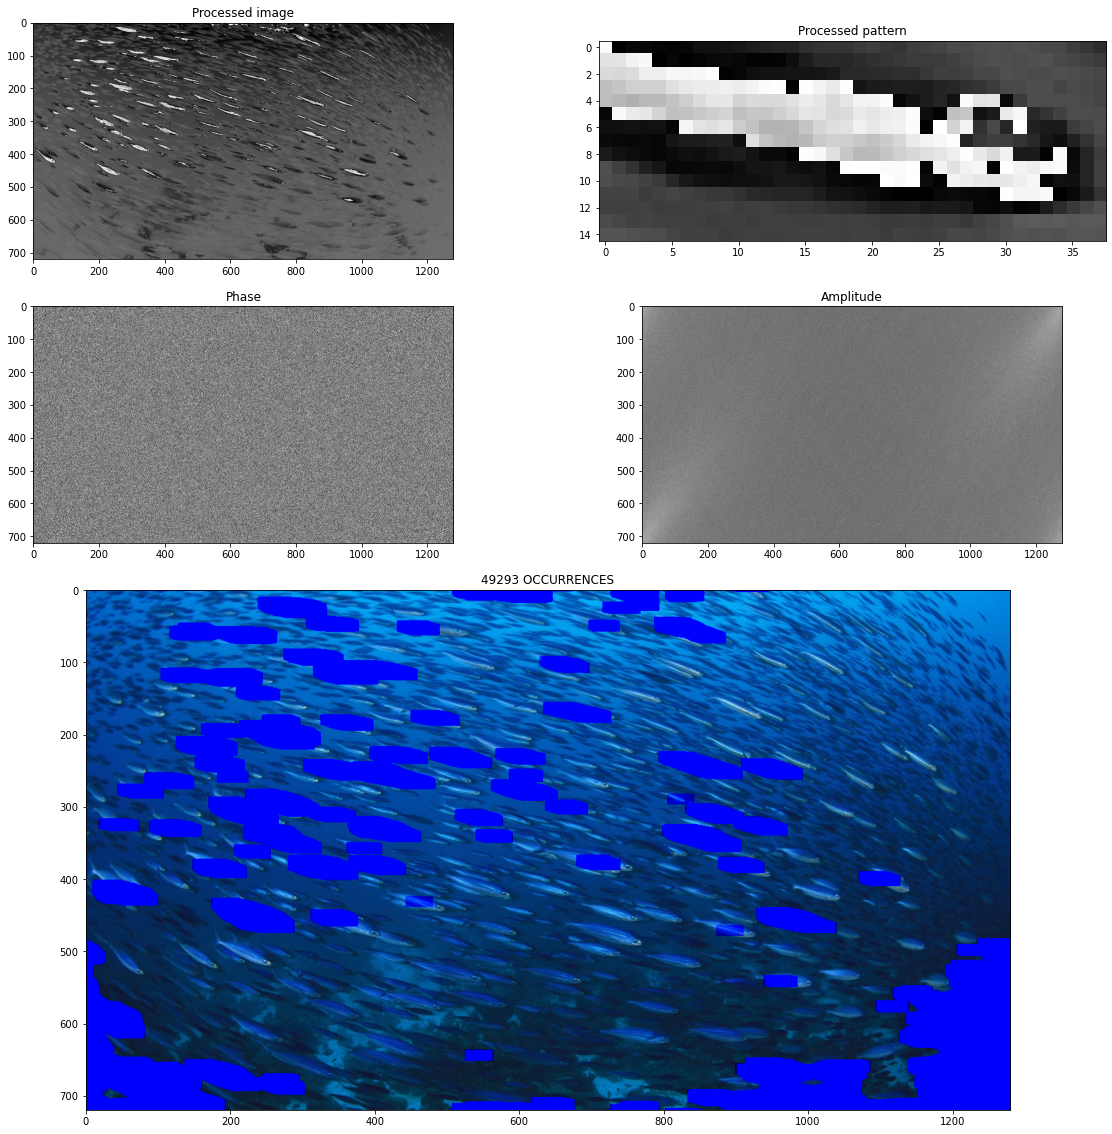

In [28]:
find_patterns('Lab9_school.jpg', 'Lab9_fish1.png', 0.5, extra_val_tranform=125)

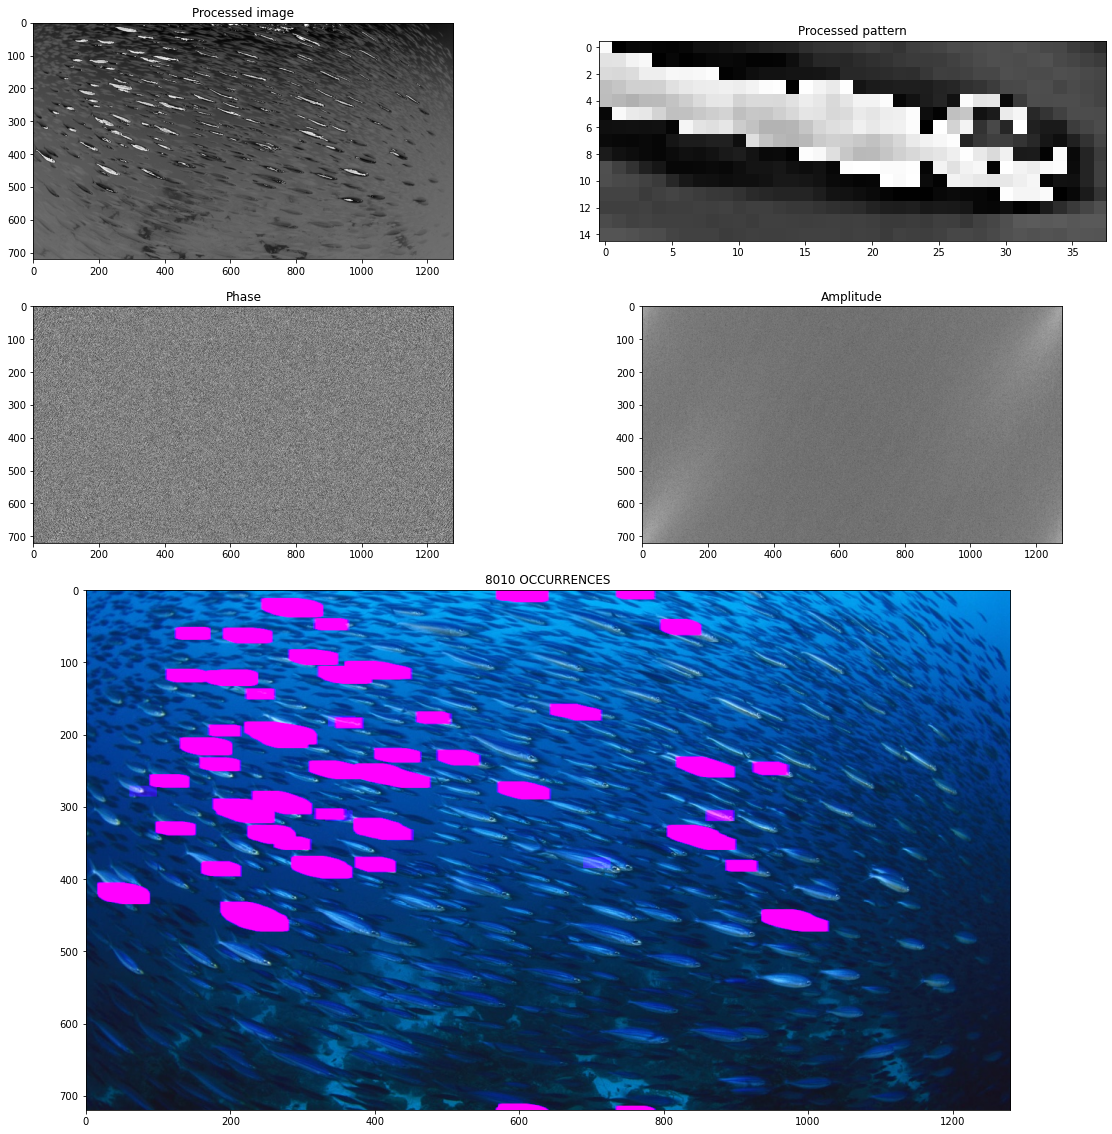

In [29]:
find_patterns('Lab9_school.jpg', 'Lab9_fish1.png', 0.6, extra_val_tranform=125, rgb_diffs=(40,-20,100))


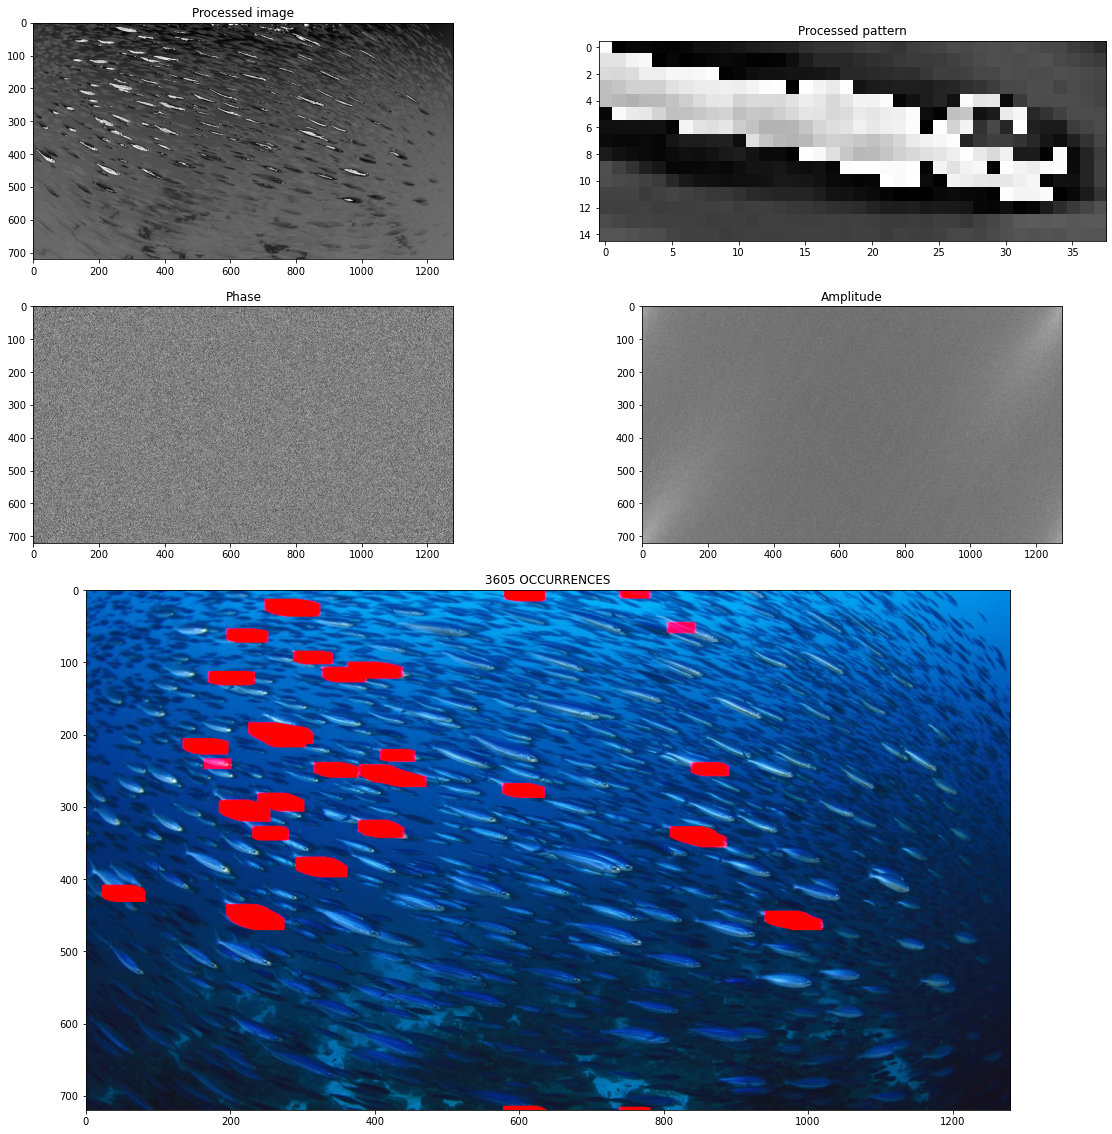

In [30]:
find_patterns('Lab9_school.jpg', 'Lab9_fish1.png', 0.7, extra_val_tranform=125, rgb_diffs=(120,-30,-20))

### Tekst

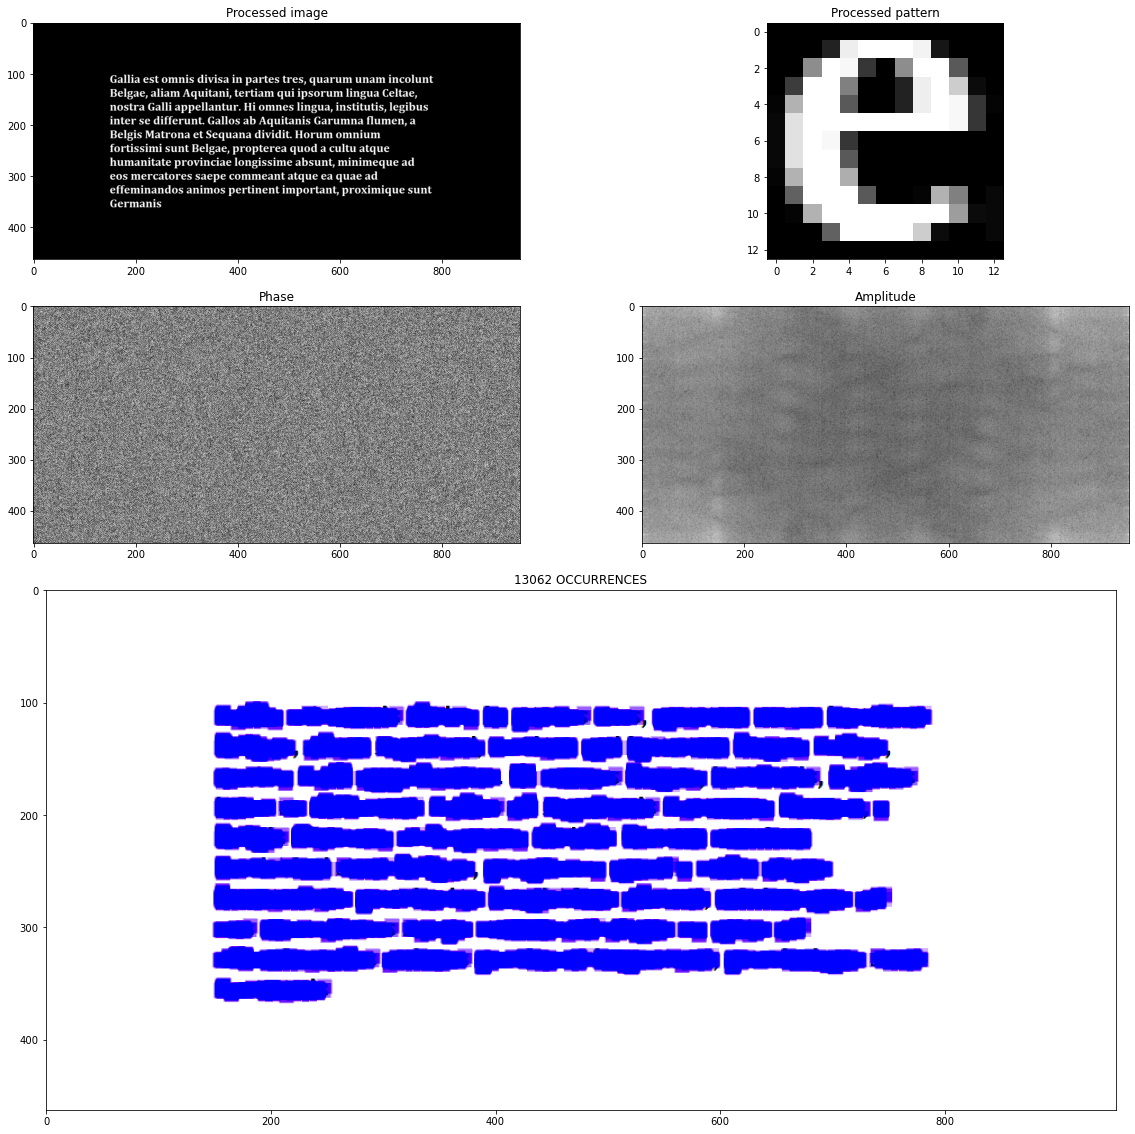

In [31]:
find_patterns('Lab9_galia.png', 'Lab9_galia_e.png', 0.5)

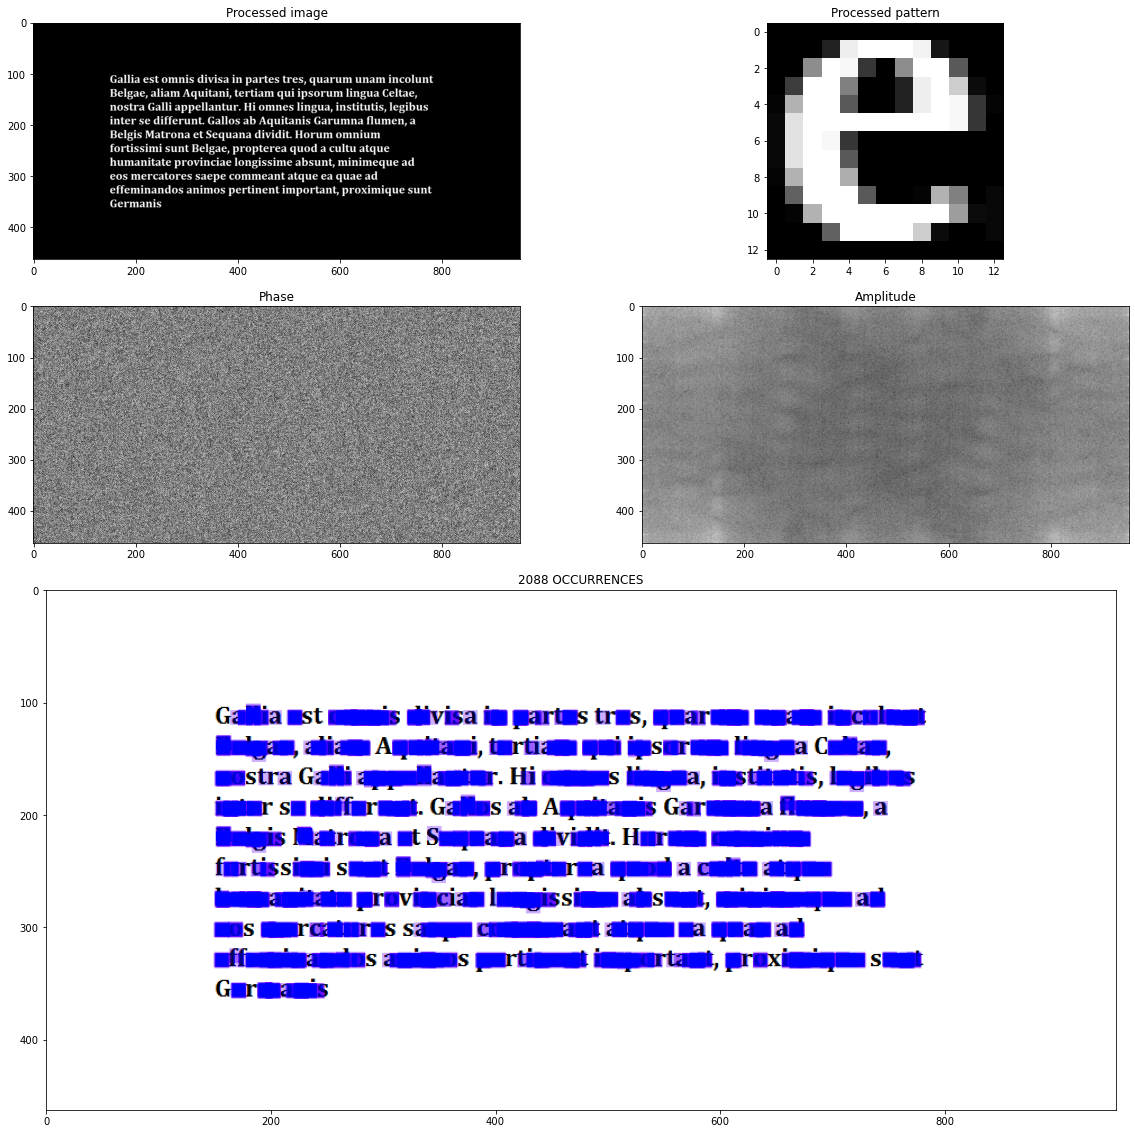

In [32]:
find_patterns('Lab9_galia.png', 'Lab9_galia_e.png', 0.7)

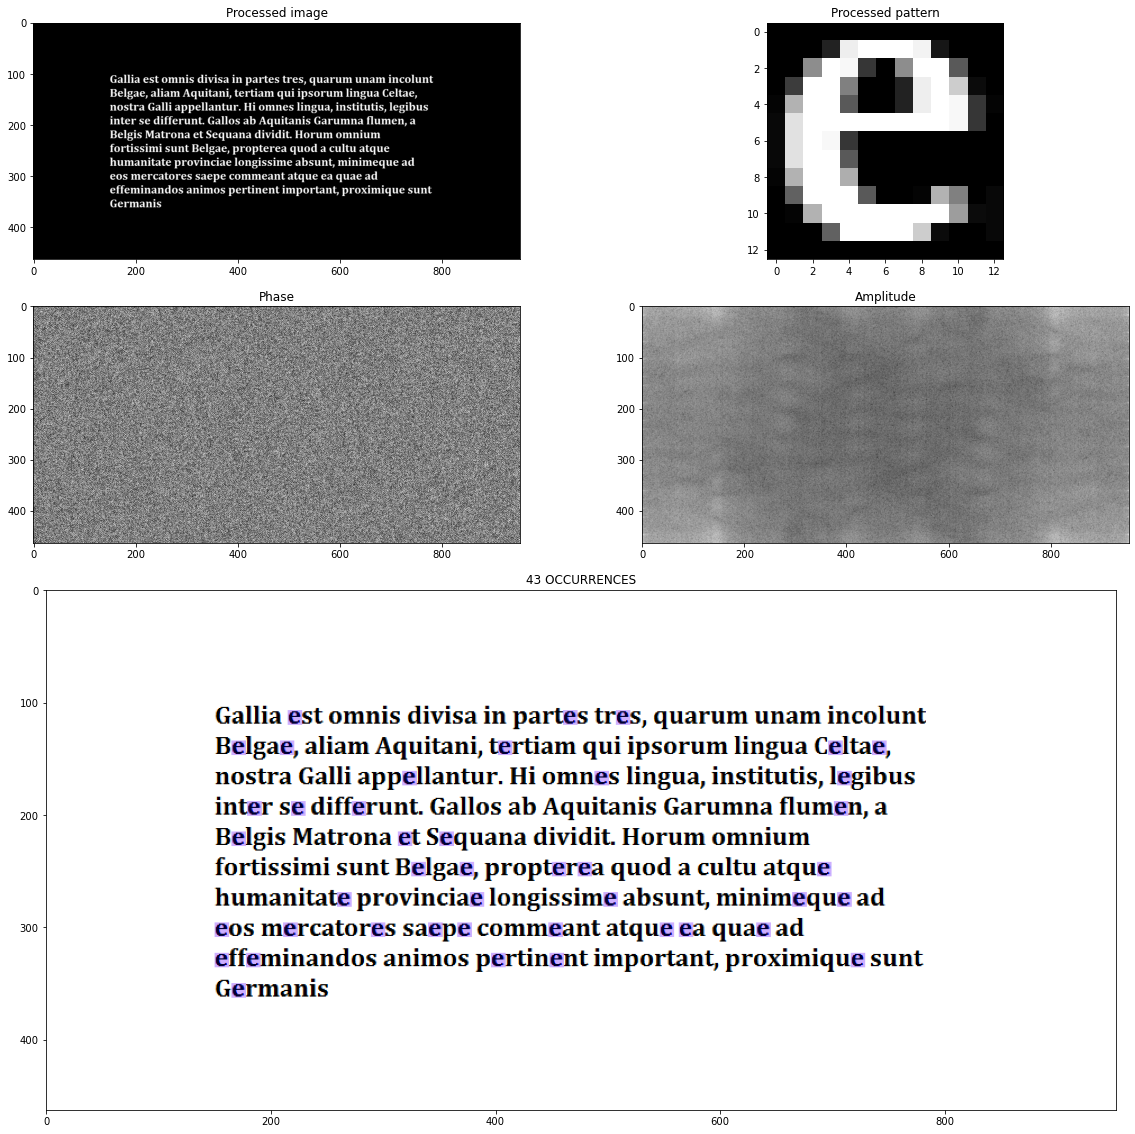

In [33]:
find_patterns('Lab9_galia.png', 'Lab9_galia_e.png', 0.9)

## 2. OCR
Napisz program przekształacajacy obraz w tekst, przyjmujac nastepujace załozenia:
1. Na obrazie znajduje sie tekst złozony z małych liter alfabetu łacinskiego oraz cyfr
2. Na obrazie wystepuje jeden typ i rozmiar czcionki
3. Wez pod uwage czcionki szeryfowe i bezszeryfowe
4. W tekscie wystepuja znaki przestankowe: .,?!
5. Tekst składa sie z wielu linii
6. Tekst moze byc obrócony (krzywo zeskanowany w całosci)
7. Program powinien zwracac tekst wraz ze znakami białymi i znakami nowych linii
8. Program moze raportowac procent poprawnie rozpoznanych liter dla pre-definiowanych
obrazów testowych
9. Program powinien dodatkowo zliczac liczbe wystapien kazdej litery
10. Nalezy zastosowac operacje splotu i DFT albo inne metody (klasyfikacja)
11. Nalezy dokonac redukcji szumu na obrazie wejsciowym